In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import warnings
import pickle
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [33]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
crop.shape

(2200, 8)

In [35]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [36]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [37]:
crop.duplicated().sum()

0

In [38]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


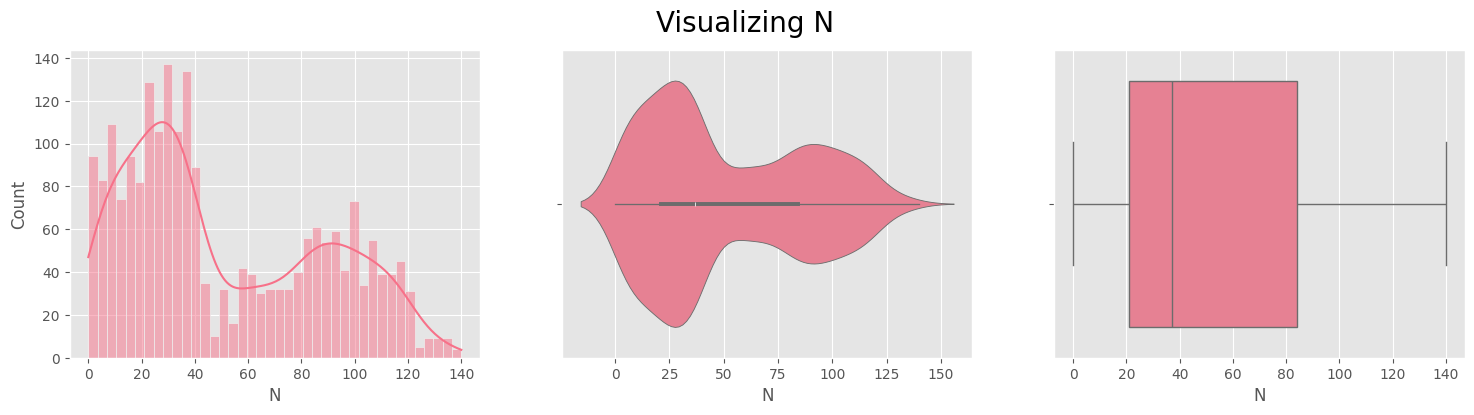

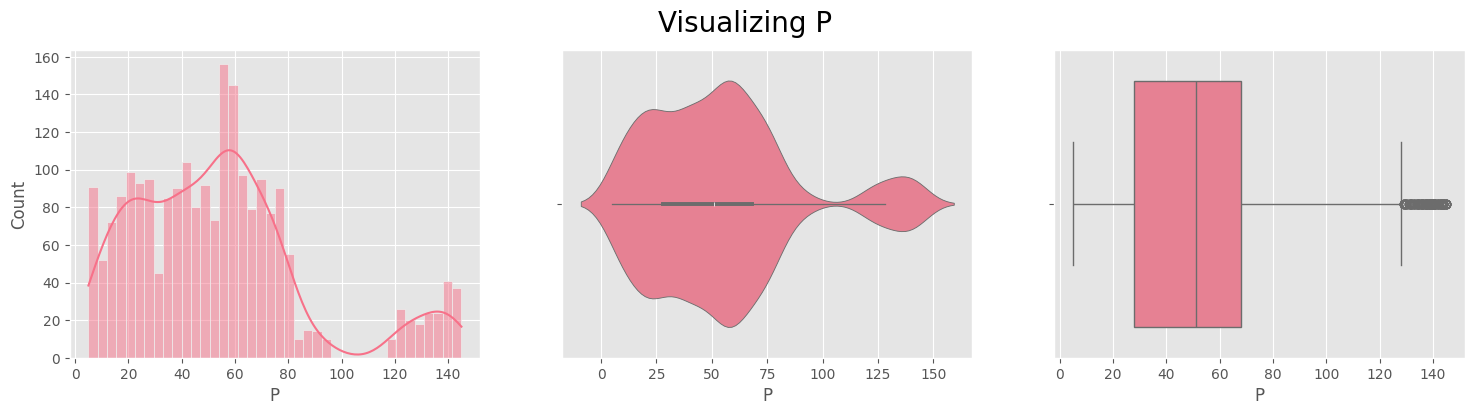

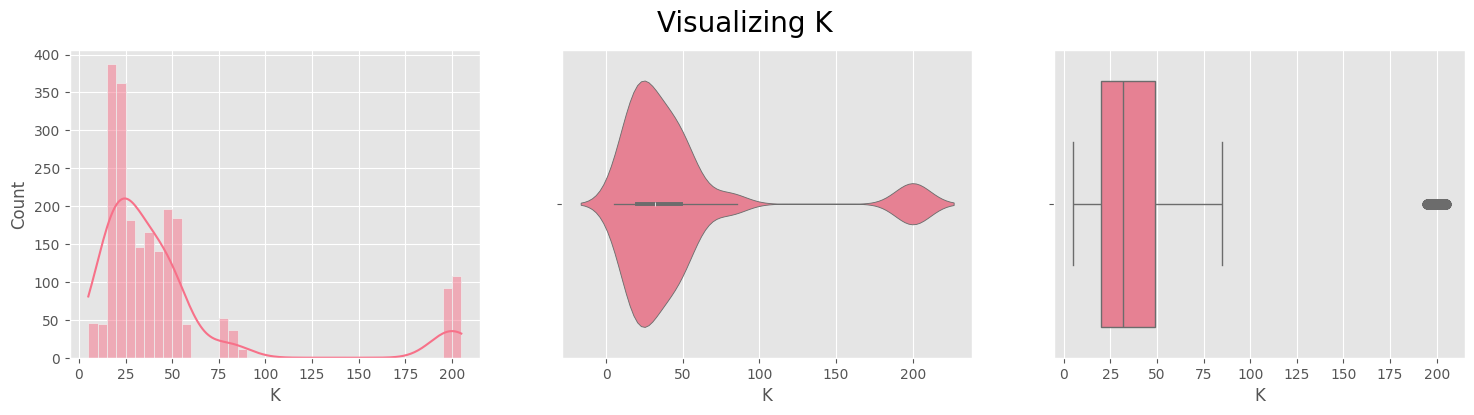

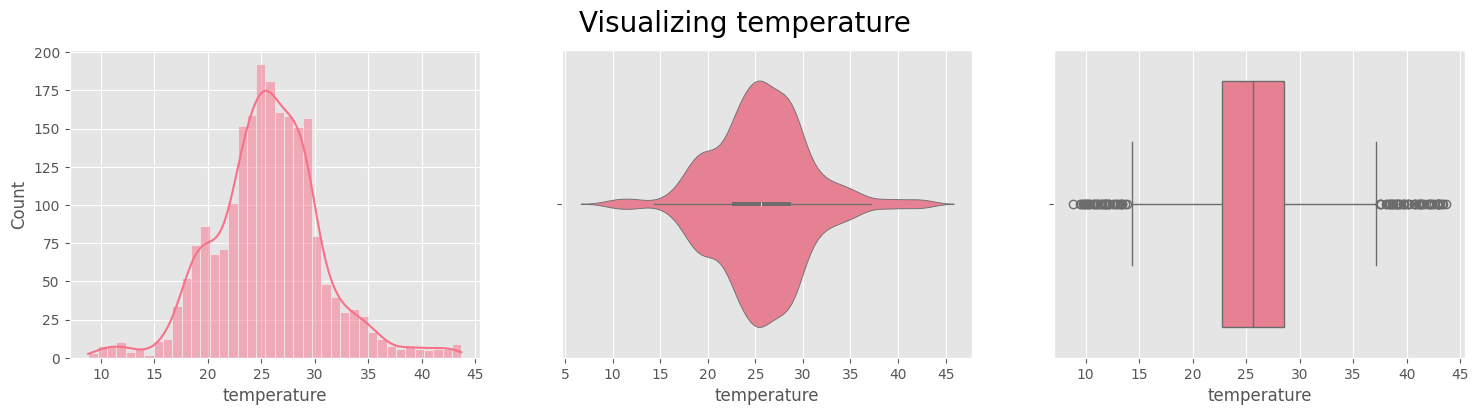

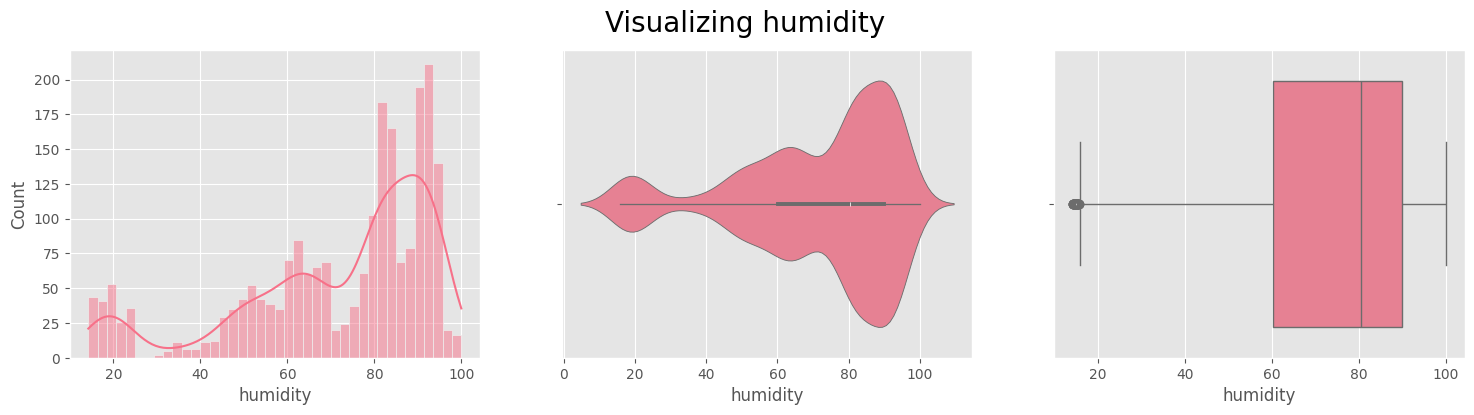

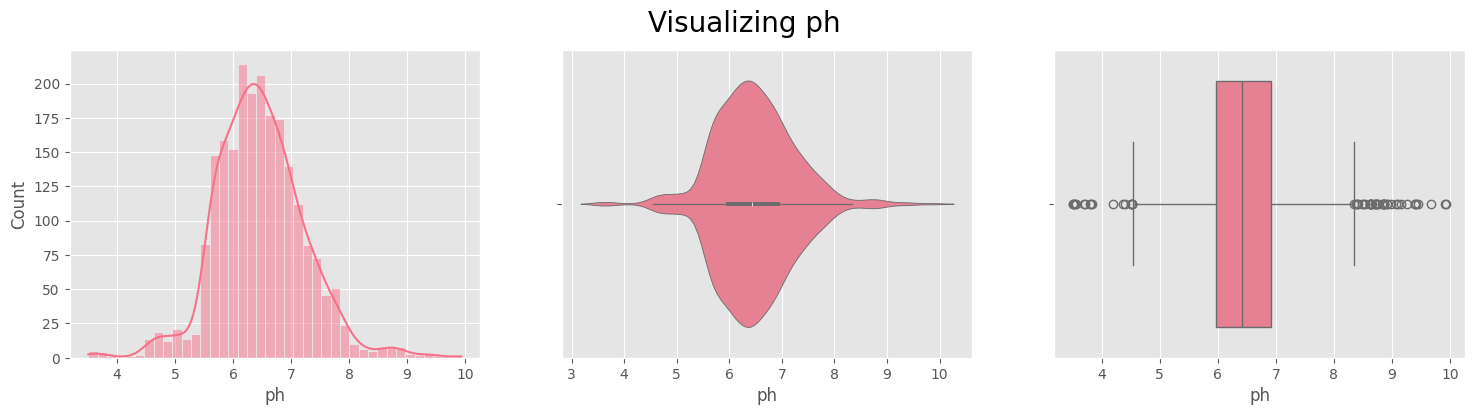

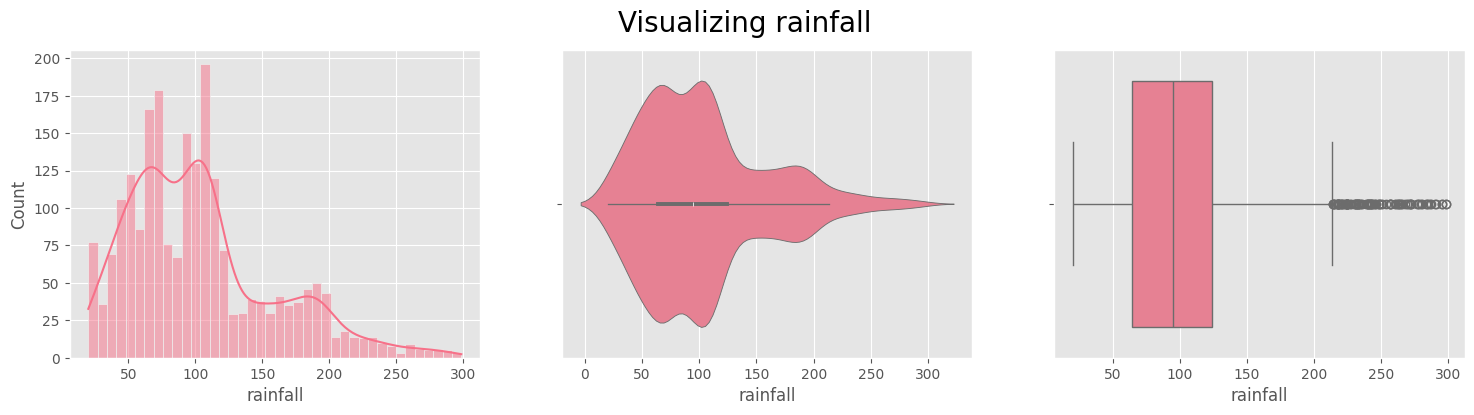

In [39]:
plt.style.use('ggplot')
sns.set_palette("husl")
for i in crop.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=crop,x=i,kde=True,bins=40,ax=ax[0])
    sns.violinplot(data=crop,x=i,ax=ax[1])
    sns.boxplot(data=crop,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [40]:
grouped = crop.groupby(by='label').mean().reset_index()
grouped

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [41]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Most N requiring crops:
********************************
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
********************************
Top 5 Most P requiring crops:
********************************
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
********************************
Top 5 Most K requiring crops:
********************************
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
********************************
Top 5 Most temperature requiring crops:
********************************
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
********************************
Top 5 Most humidity requiring crops:
********************************
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple -

In [42]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Least N requiring crops:
********************************
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
********************************
Top 5 Least P requiring crops:
********************************
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
********************************
Top 5 Least K requiring crops:
********************************
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
********************************
Top 5 Least temperature requiring crops:
********************************
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
********************************
Top 5 Least humidity requiring crops:
********************************
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.061633

In [43]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [44]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [45]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [46]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [47]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [48]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [49]:
y.shape

(2200,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
X_train.shape

(1760, 7)

In [53]:
X_test.shape

(440, 7)

In [54]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [55]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = crop['label']
acc = []
model = []

# DECISION TREE MODEL

In [56]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

decisiontree.fit(X_train,y_train)

predicted_values = decisiontree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           1       1.00      0.62      0.77        16
           2       1.00      1.00      1.00        21
           3       0.74      0.93      0.83        28
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21
           6       1.00      0.84      0.91        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       0.68      1.00      0.81        23
          16       0.59      1.00      0.74        16
          17       1.00      1.00      1.00   

In [57]:
# Cross validation score (Decision Tree)
score = cross_val_score(decisiontree, features, target,cv=5)

In [58]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [59]:
pickle.dump(decisiontree,open('decisiontree.pkl','wb'))

# GAUSSIAN NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()

naivebayes.fit(X_train,y_train)

predicted_values = naivebayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        16
           2       1.00      1.00      1.00        21
           3       0.88      1.00      0.93        28
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        16
          17       1.00      1.00  

In [61]:
# Cross validation score (NaiveBayes)
score = cross_val_score(naivebayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [62]:
pickle.dump(naivebayes,open('naivebayes.pkl','wb'))

# SUPPORT VECTOR MACHINE

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        16
           2       1.00      0.95      0.98        21
           3       0.83      0.86      0.84        28
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        16
          17       1.00      1.00      1.0

In [64]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [65]:
pickle.dump(SVM,open('svm.pkl','wb'))

# LOGISTIC REGRESSION

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=2)

logreg.fit(X_train,y_train)

predicted_values = logreg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           1       0.85      0.69      0.76        16
           2       0.90      0.86      0.88        21
           3       0.84      0.93      0.88        28
           4       0.86      0.90      0.88        20
           5       1.00      1.00      1.00        21
           6       1.00      0.95      0.97        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       0.96      1.00      0.98        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       0.88      1.00      0.94        23
          16       0.86      0.75      0.80        16
          17       1.00   

In [67]:

# Cross validation score (Logistic Regression)
score = cross_val_score(logreg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [68]:
pickle.dump(logreg,open('logreg.pkl','wb'))

In [69]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        16
           2       1.00      1.00      1.00        21
           3       0.90      1.00      0.95        28
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       0.94      1.00      0.97        16
          17       1.00      1.00      1.00 

In [70]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [71]:
pickle.dump(RF,open('rf.pkl','wb'))

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

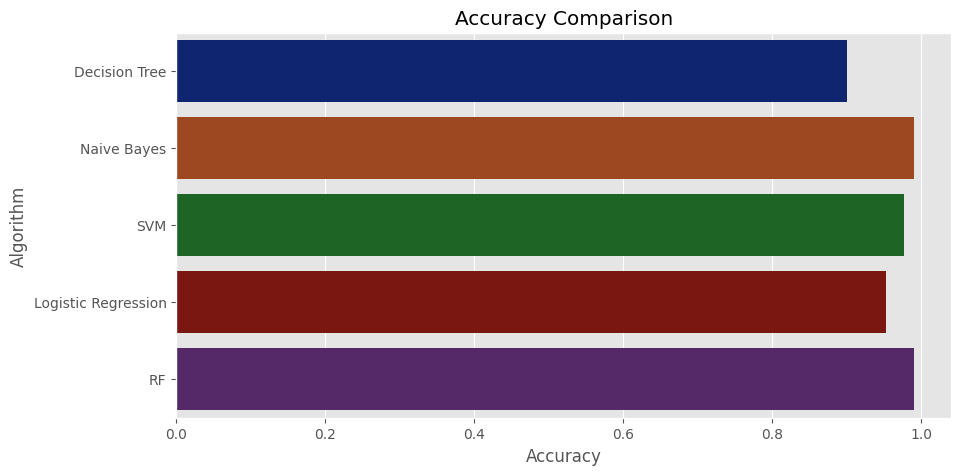

In [72]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [73]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 90.0
Naive Bayes --> 99.0909090909091
SVM --> 97.72727272727273
Logistic Regression --> 95.22727272727273
RF --> 99.0909090909091


In [87]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = RF.predict(features).reshape(1,-1)
    
    return prediction[0]

In [89]:
N = 28
P = 65
k = 23
temperature = 29
humidity = 62
ph = 7.4
rainfall = 75

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coffee", 6: "Apple", 7: "Papaya",
                 8: "Orange", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coconut"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Blackgram is a best crop to be cultivated 
